# Import Packages

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

# Read the Data and its Descriptive Statistics

In [2]:
tracks = pd.read_csv("data/processed/tracks.csv")
tracks.head()
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,artists_popularity,release_year
count,102433.00000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.00000,102433.000000
mean,40.04643,0.044896,0.099851,0.613267,0.650104,0.483473,0.824242,0.618775,0.124412,0.300207,0.071609,0.200381,0.522598,0.556447,0.786307,0.025398,0.55168,0.468743
std,18.58119,0.023697,0.299802,0.157368,0.217551,0.324737,0.069880,0.485690,0.131802,0.296113,0.219458,0.174287,0.249565,0.131358,0.071208,0.082945,0.18492,0.299653
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,31.00000,0.036693,0.000000,0.511675,0.507000,0.181818,0.798146,0.000000,0.051603,0.037149,0.000000,0.096800,0.322000,0.453569,0.800000,0.000295,0.43000,0.230769
50%,42.00000,0.042857,0.000000,0.621320,0.677000,0.454545,0.837834,1.000000,0.070229,0.193775,0.000002,0.128000,0.517000,0.558894,0.800000,0.001833,0.56000,0.461538
75%,53.00000,0.050113,0.000000,0.726904,0.826000,0.818182,0.867753,1.000000,0.128092,0.519076,0.000569,0.253000,0.727000,0.636032,0.800000,0.010898,0.67000,0.692308
max,99.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Correlation between each Feature

In [3]:
tracks.corr().head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,artists_popularity,release_year
popularity,1.000000,-0.065920,0.150017,0.119296,-0.070457,-0.005264,0.108960,0.000593,0.044204,0.052401,-0.288239,-0.098858,0.000040,-0.018959,0.005241,0.164017,0.571956,0.142030
duration_ms,-0.065920,1.000000,-0.059621,-0.114772,-0.001986,0.007728,-0.016157,0.000700,-0.081549,-0.023170,0.078503,0.027302,-0.145982,0.004946,-0.005045,-0.012388,-0.069877,-0.090019
explicit,0.150017,-0.059621,1.000000,0.176007,0.034774,0.004416,0.032236,-0.066900,0.391287,-0.070548,-0.075058,-0.018085,-0.026680,-0.020083,0.036698,0.055407,0.150094,0.183912
danceability,0.119296,-0.114772,0.176007,1.000000,0.113467,0.014786,0.169884,-0.078088,0.190556,-0.122688,-0.131754,-0.158037,0.459116,-0.121616,0.151034,0.039162,0.055279,0.136686
energy,-0.070457,-0.001986,0.034774,0.113467,1.000000,0.031165,0.717594,-0.088719,0.122986,-0.684878,-0.031159,0.173753,0.367705,0.178128,0.159640,0.012704,0.008986,-0.052528


# Heatmap to Showcase the Correlation between the Features

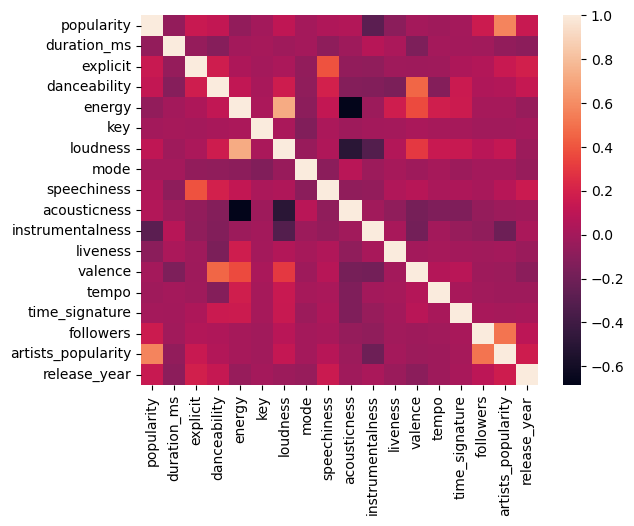

In [4]:
sns.heatmap(tracks.corr(), annot=False);

# Popularity Feature and its Correlation for each Respective Feature

In [5]:
tracks.corr()[['popularity']]

,popularity
popularity,1.000000
duration_ms,-0.065920
explicit,0.150017
danceability,0.119296
energy,-0.070457
key,-0.005264
loudness,0.108960
mode,0.000593
speechiness,0.044204
acousticness,0.052401


# Drop Features with no-to-little Correlation and create our X and y Arrays

In [6]:
X = tracks.drop(columns=['popularity','key','mode','valence','time_signature']).to_numpy()
y = tracks.loc[:, 'popularity'].to_numpy()

# Split our Dataset into Training and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create our Linear Regression Model and fit our Training Sets

In [8]:
linear_model = lm.LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

# Predict our y_pred values using our linear model with our X_test set

In [9]:
y_pred = linear_model.predict(X_test)

# Calculate our Train and Test Set RMSE

In [10]:
linear_model.predict(X_train).shape

(81946,)

In [11]:
y_train.shape

(81946,)

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
train_rmse = mean_squared_error(y_train, linear_model.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
train_rmse, test_rmse

(14.329901505832153, 14.441436976656012)

# Plot the Distribution of the y_train, y_test, y_pred

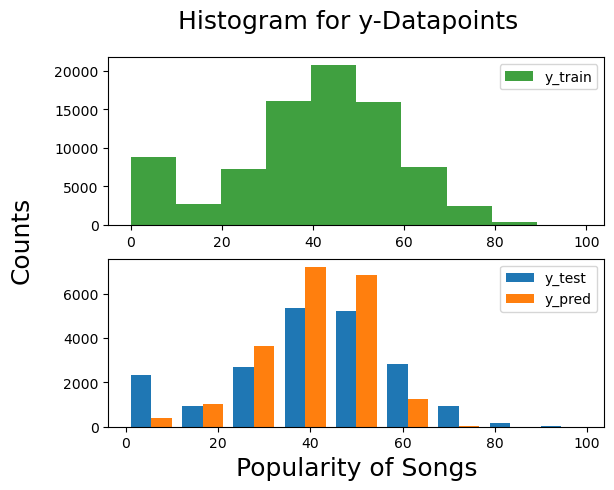

In [14]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Histogram for y-Datapoints', fontsize=18)
plt.xlabel('Popularity of Songs', fontsize=18)
fig.text(-0.01, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize=18)
ax1.hist(y_train, 10, facecolor='g', alpha=0.75, label=['y_train'])
ax1.legend(loc='upper right')
ax2.hist([y_test, y_pred], bins = np.linspace(0, 100, 10), label=['y_test', 'y_pred'])
ax2.legend(loc='upper right');

In [15]:
#n_train, bins_train, pathches_train = plt.hist(y_train, 10, density=True, facecolor='g', alpha=0.75)

In [16]:
#n_test, bins_test, pathches_test = plt.hist(y_test, 10, density=True, facecolor='g', alpha=0.75)

In [17]:
#n_pred, bins_pred, pathches_pred = plt.hist(y_pred, 10, density=True, facecolor='g', alpha=0.75)

In [18]:
# Since we do not have a gaussion distribution, we would not be able to accurately predict the low-popularity songs.

# Plot our Predictions vs Observations and our Residual Plot

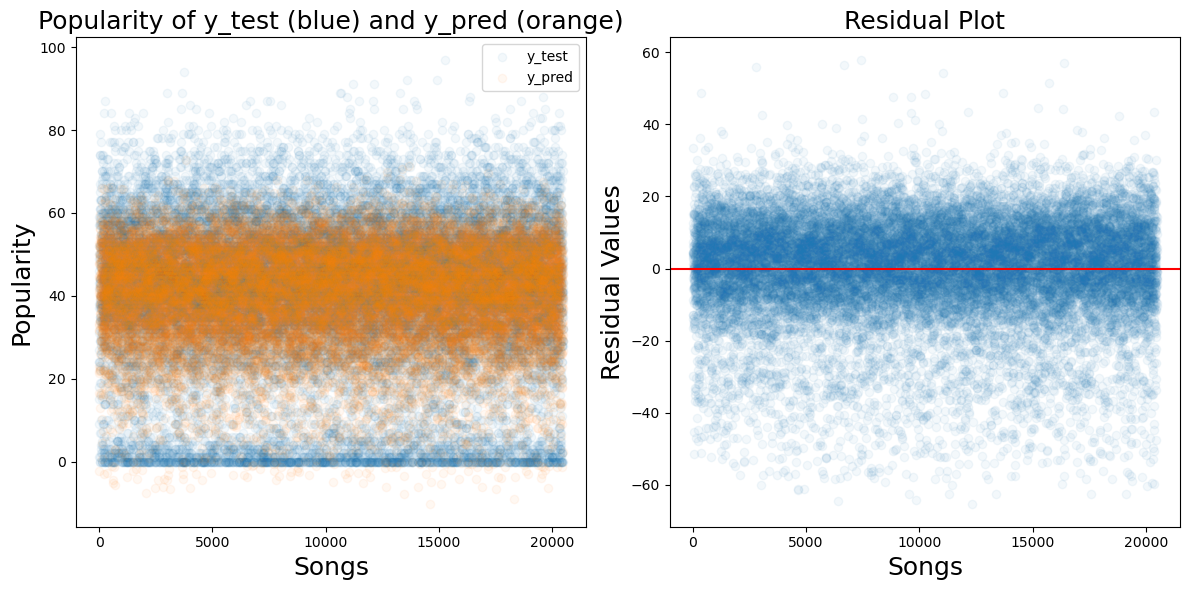

In [19]:
plt.figure(figsize=(12,6))     

plt.subplot(121)                
# (1) predictions vs observations
plt.scatter(np.arange(len(y_test)), y_test,alpha=0.05, label='y_test')
plt.scatter(np.arange(len(y_test)), y_pred, alpha=0.05, label='y_pred')
plt.legend();
plt.xlabel('Songs', fontsize=18);
plt.ylabel('Popularity', fontsize=18);
plt.title("Popularity of y_test (blue) and y_pred (orange)", fontsize=18);

plt.subplot(122)               
# (2) residual plot
plt.scatter(np.arange(len(y_test)), y_test - y_pred, alpha=0.05)
plt.axhline(y = 0, color='r');
plt.ylabel("Residual Values", fontsize=18)
plt.xlabel("Songs" ,fontsize=18)
plt.title("Residual Plot", fontsize=18)
# NOTE: For multiple linear regression, I'm using the predicted values vs. residuals for the residual plot.
# Shows a pattern, so may not be a good residual plot (should have a similar vertical spread)

plt.tight_layout() # Adjust the padding between and around subplots.


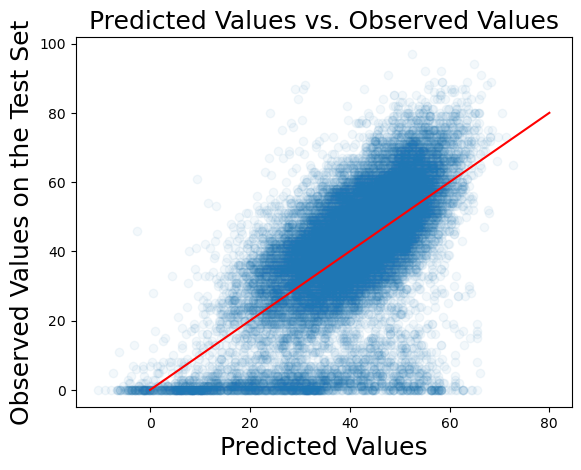

In [20]:
plt.scatter(y_pred, y_test, alpha=0.05)
plt.plot(np.linspace(0,80),np.linspace(0,80), color='r')
plt.ylabel("Observed Values on the Test Set", fontsize=18)
plt.xlabel("Predicted Values", fontsize=18)
plt.title("Predicted Values vs. Observed Values", fontsize=18);

# Calculate our R2 Score

In [21]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.39604577636850735

# KDE Distribution

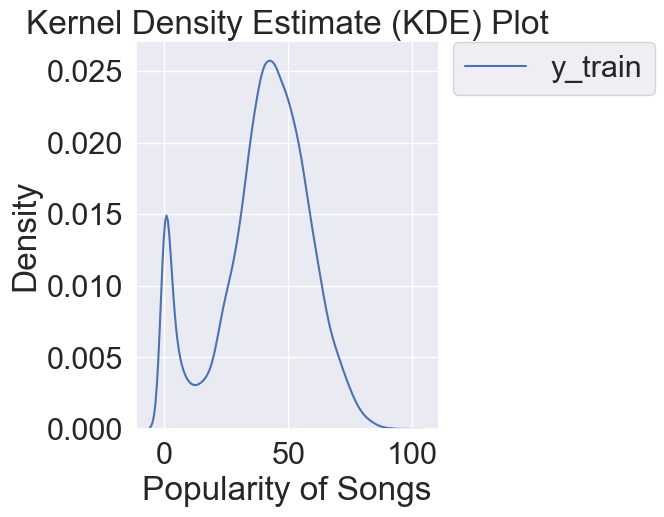

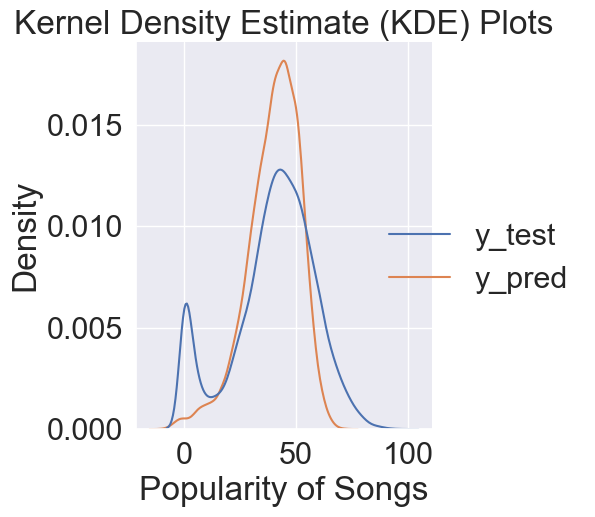

In [22]:
sns.set(font_scale=2)
n = sns.displot(y_train, kind = "kde", legend=False);
sns.set(font_scale=2)
plt.xlabel('Popularity of Songs')
plt.legend(labels=["y_train"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Kernel Density Estimate (KDE) Plot');


h = sns.displot([y_test, y_pred], kind = "kde");
sns.set(font_scale=2)
new_labels = ['y_test', 'y_pred']
for t, l in zip(h._legend.texts, new_labels):
    t.set_text(l)
plt.xlabel('Popularity of Songs');
plt.title('Kernel Density Estimate (KDE) Plots');

# Chebyshev's Inquality for Estimation of Outliers (Remove)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [24]:
mu_Y_train = y_train.mean()
std_Y_train = y_train.std()

In [25]:
k = np.arange(0.1, 3.1, 0.1) # Change for standard deviation

upper_bound = mu_Y_train + k * std_Y_train
lower_bound = mu_Y_train - k * std_Y_train

In [26]:
from sklearn.neighbors import KernelDensity

Y = np.array(y_train).reshape((len(y_train), 1))

kde = KernelDensity(bandwidth=3).fit(Y)

new_Y = np.linspace(np.min(Y), np.max(Y), 1000)[:, np.newaxis]
log_dens = kde.score_samples(new_Y)

In [27]:
# plt.plot(new_Y,np.exp(log_dens), lw=2)

# line_mu_y = np.exp(kde.score_samples(np.array(mu_Y_train, dtype=object).reshape(1,1)))
# plt.plot([mu_Y_train, mu_Y_train], [0, line_mu_y[0]], c='g', lw=3)

# line_upper_y = np.exp(kde.score_samples(np.array(upper_bound).reshape(1,1)))
# plt.plot([upper_bound, upper_bound], [0, line_upper_y[0]], c='r', lw=3)

# line_lower_y = np.exp(kde.score_samples(np.array(lower_bound).reshape(1,1)))
# plt.plot([lower_bound, lower_bound], [0, line_lower_y[0]], c='r', lw=3)

# ptx = np.linspace(lower_bound, upper_bound, 100)
# pty = np.exp(kde.score_samples(ptx.reshape(len(ptx),1)))
# plt.fill_between(ptx, pty, color='r', alpha=0.2)

# plt.ylim(0, )
# plt.show()

In [28]:
new_y_train = np.empty(k.size)
new_X_train = np.empty(k.size)
new_y_pred = np.empty(k.size)
new_train_rmse = np.empty(k.size)
new_test_rmse = np.empty(k.size)

for i in range(len(k)): 
    new_y_train = y_train[(y_train > lower_bound[i]) & (y_train < upper_bound[i])]
    new_X_train = X_train[(y_train > lower_bound[i]) & (y_train < upper_bound[i])]
    new_linear_model = lm.LinearRegression()
    new_linear_model.fit(new_X_train, new_y_train)
    new_y_pred = new_linear_model.predict(X_test)
    
    new_train_rmse[i] =  mean_squared_error(new_y_train, new_linear_model.predict(new_X_train), squared=False)
    new_test_rmse[i] = mean_squared_error(y_test, new_y_pred, squared=False)

new_train_rmse, new_test_rmse;

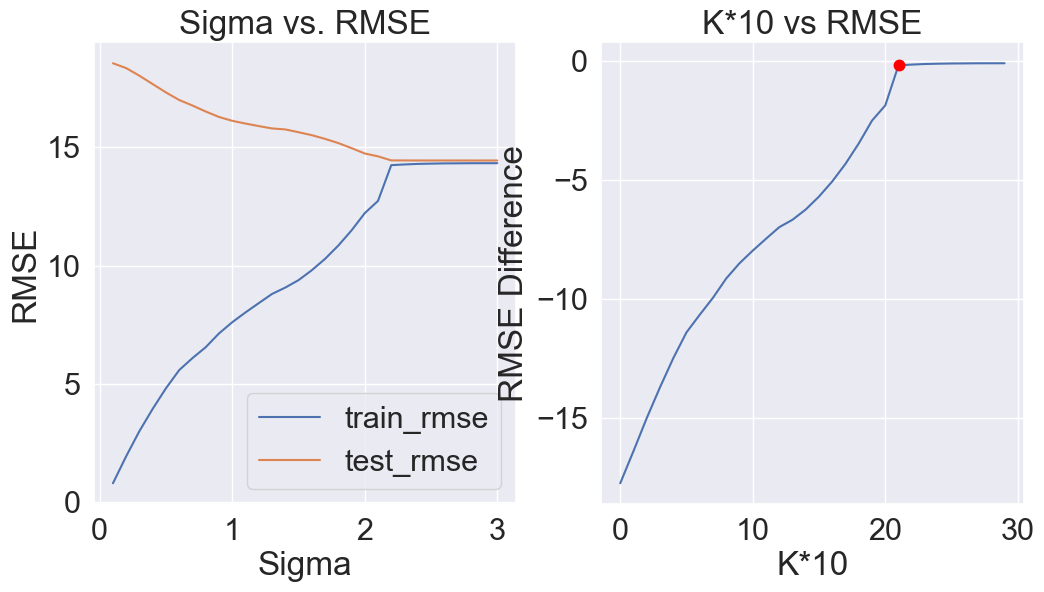

In [29]:
plt.figure(figsize=(12,6))     

plt.subplot(121)   
plt.plot(k, new_train_rmse, label= 'train_rmse')
plt.plot(k, new_test_rmse, label= 'test_rmse')
plt.legend()
plt.xlabel('Sigma')
plt.ylabel('RMSE')
plt.title('Sigma vs. RMSE')

fig.tight_layout()

plt.subplot(122)   
new_difference = new_train_rmse - new_test_rmse
plt.plot(np.arange(len(new_difference)), new_difference)
plt.plot(21, new_difference[21], '.', color = 'red', markersize = 15)
plt.xlabel('K*10')
plt.ylabel('RMSE Difference')
plt.title('K*10 vs RMSE')

fig.tight_layout()

In [30]:
train_rmse, test_rmse

(14.329901505832153, 14.441436976656012)

In [31]:
k_optimize = k[21]
new_train_optimize = new_train_rmse[21]
new_test_optimize = new_test_rmse[21]

In [32]:
train_rmse - new_train_optimize, test_rmse - new_test_optimize

(0.08520721629158601, -0.003746583096459588)

In [33]:
#y_test[y_test > upper_bound]

In [34]:
#new_linear_model = lm.LinearRegression()
#new_linear_model.fit(new_X_train, new_y_train)

In [35]:
# from sklearn.metrics import r2_score

# r2_score(y_test, new_y_pred)